## 作業
1. 請用 numpy 建立一個 10 x 10, 數值分布自 -1.0 ~ 1.0 的矩陣並繪製 Heatmap
2. 請用 numpy 建立一個 1000 x 3, 數值分布為 -1.0 ~ 1.0 的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)
3. 請用 numpy 建立一個 1000 x 3, 數值分布為常態分佈的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)

# [作業目標]
- 試著設定隨機資料, 並依照範例練習基礎與進階的 Heatmap

# [作業重點]
- 如題1.條件隨機矩陣, 並仿造基礎 Heatmap 範例作圖   
(In[2], OUT[2]) (Hint : numpy.random.random - 均勻分布, 隨機小數)
- 如題2.3.條件隨機數值列, 並仿造進階 Heatmap 範例作圖  
(In[3], OUT[3], In[4], OUT[4]) (Hint : numpy.random.randn - 常態分布)

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
plt.style.use('ggplot')

# 忽略警告訊息
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

               0          1          2          3          4          5  \
count  10.000000  10.000000  10.000000  10.000000  10.000000  10.000000   
mean    0.258837   0.116810  -0.031089   0.303895   0.090269   0.036750   
std     0.589281   0.571164   0.615778   0.383007   0.549357   0.651594   
min    -0.790551  -0.805526  -0.854916  -0.520292  -0.765119  -0.950263   
25%    -0.124702  -0.404963  -0.576108   0.163524  -0.397620  -0.484765   
50%     0.349408   0.322730   0.103223   0.329331   0.241534  -0.036729   
75%     0.742725   0.483820   0.328464   0.520317   0.434442   0.543556   
max     0.987861   0.849985   0.784087   0.896307   0.818387   0.992634   

               6          7          8          9  
count  10.000000  10.000000  10.000000  10.000000  
mean   -0.320469  -0.128888   0.428566   0.192594  
std     0.515543   0.636219   0.506812   0.517859  
min    -0.944516  -0.818083  -0.348729  -0.610406  
25%    -0.716605  -0.656685   0.016287  -0.064544  
50%    -0.37

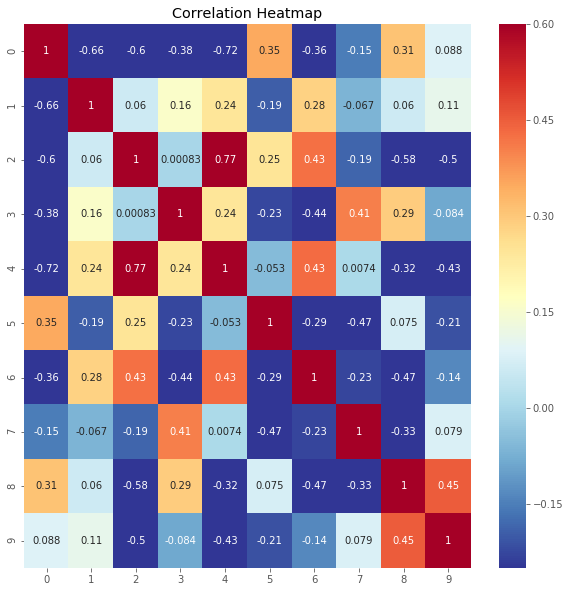

In [9]:
"""
Your Code Here
"""
matrix = 2 * np.random.random_sample((10, 10)) - 1
matrix=pd.DataFrame(matrix)

print(matrix.describe())

matrix_corrs = matrix.corr()
print(matrix.corr())

plt.figure(figsize=(10,10))
"""
Your Code Here
"""
heatmap = sns.heatmap(matrix_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap')
plt.show()

[[-0.85398157 -0.22191113 -0.20796964]
 [ 0.51654373  0.41657812 -0.64179368]
 [ 0.43724876 -0.95852602 -0.9528718 ]
 ...
 [-0.06030746  0.78465724  0.50299495]
 [ 0.14906581  0.05587579  0.34264529]
 [ 0.69831365  0.84031459  0.66236453]]
   index         0         1         2
0      1 -0.853982 -0.221911 -0.207970
1      1  0.516544  0.416578 -0.641794
2      1  0.437249 -0.958526 -0.952872
3      2 -0.922972 -0.345192 -0.319417
4      2  0.162054 -0.187265  0.722826


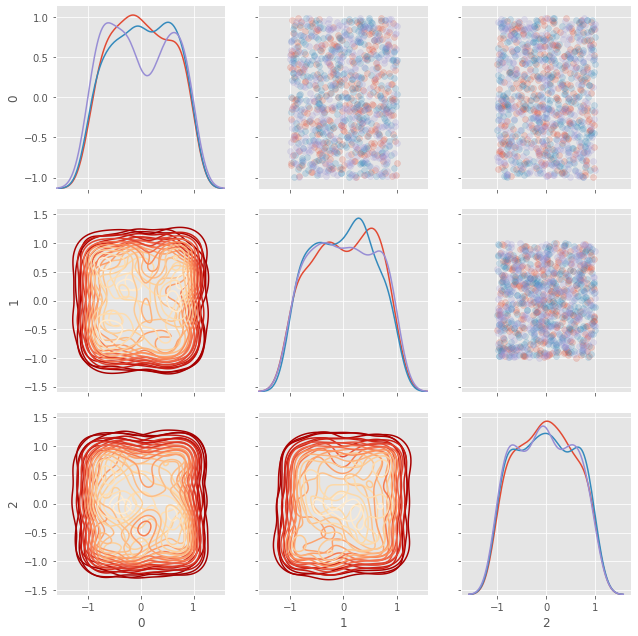

In [30]:
nrow = 1000
ncol = 3
"""
Your Code Here
"""
matrix = 2 * np.random.random_sample((nrow, ncol)) - 1
#先不要轉成 df
#print(matrix)


# 隨機給予 0, 1, 2 三種標籤
indice = np.random.choice([0,1,2], size=nrow)
#print(indice)

plot_data = pd.DataFrame(matrix, indice).reset_index()
print(plot_data.head())


# 繪製 seborn 進階 Heatmap
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False, 
                    hue = 'index', vars = [x for x in list(plot_data.columns) if x != 'index'])
"""
Your Code Here
Please replace "..." to correct plot function
"""
grid.map_upper(plt.scatter, alpha = 0.2)
grid.map_diag(sns.kdeplot)
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

plt.show()

1000
   index         0         1         2
0      1  0.112908 -0.060509 -0.061505
1      1  0.048348  0.081486 -0.143767
2      0  0.031613  0.044378 -0.186968
3      1  0.091078 -0.084575  0.057588
4      2 -0.033216 -0.157533  0.021038


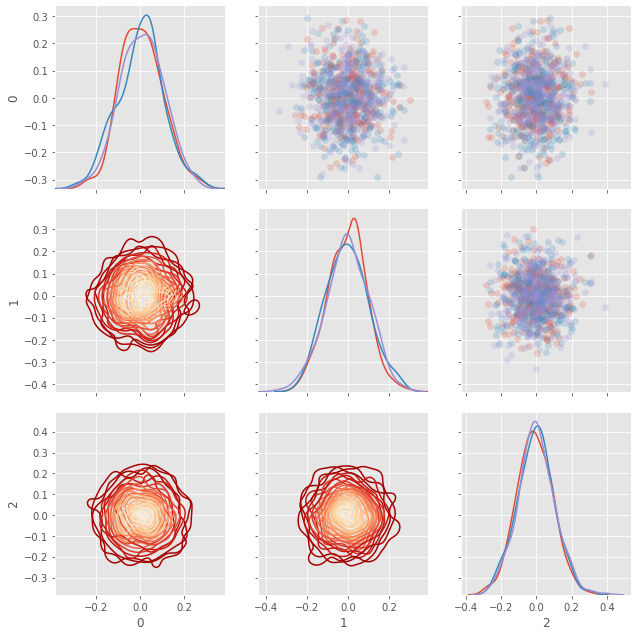

In [31]:
nrow = 1000
ncol = 3
"""
Your Code Here
"""
matrix = []
i=1
while i <= nrow:
    m=np.random.normal(0, 0.1, ncol)
    matrix.append(m)
    i+=1
print(len(matrix))
    
# 隨機給予 0, 1, 2 三種標籤
indice = np.random.choice([0,1,2], size=nrow)
plot_data = pd.DataFrame(matrix, indice).reset_index()

print(plot_data.head())

# 繪製 seborn 進階 Heatmap
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'index', vars = [x for x in list(plot_data.columns) if x != 'index'])
"""
Your Code Here
Please replace "..." to correct plot function
"""
grid.map_upper(plt.scatter, alpha = 0.2)
grid.map_diag(sns.kdeplot)
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

plt.show()